# 图像特效

1. 灰度处理
2. 底板特效
3. 马赛克
4. 毛玻璃
7. 浮雕/雕刻
8. 颜色映射
9. 油画效果

## 灰度处理

如果灰度图有三个颜色通道，则三个通道的值是相等的。  
如果是单通道的灰度图片，这个灰度值需要通过彩色图的RGB值来计算。  
灰度特效很重要，是很多图像运算的基础，可以提高运算的实时性。
<img src='images/灰度处理.jpg' width=50%>

In [28]:
#方法1 imread 
import cv2
img0 = cv2.imread('image0.jpg', 0)
img1 = cv2.imread('image0.jpg', 1)
print(img0.shape)
print(img1.shape)
cv2.imshow('src',img0)
cv2.waitKey(0)

(547, 730)
(547, 730, 3)


-1

In [29]:
#方法2 cvtColor
import cv2
img = cv2.imread('image0.jpg', 1)
# 颜色空间转换
dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 1 data 2 BGR gray
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [30]:
# 方法3 gray = r*x+g*y+b*z
# x,y,z的范围都在[0,1]之间，且三者之和等于1，不同的值对应不同的图像灰度
import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3),np.uint8)
# dst = np.zeros((height,width,1), np.uint8)

for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        # uint8类型的数据进行相加时，很容易溢出
        b, g, r = int(b), int(g), int(r)
        # 以下参数考虑到了人眼的生理特点
        gray = r*0.299+g*0.587+b*0.114
        dst[i,j] = np.uint8(gray)

cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

**算法优化**

定点运算快于浮点运算，加减操作快于乘除操作，移位操作快于乘除操作

可以进行如下两步优化：
```python
gray = r*0.299+g*0.587+b*0.114  
-> gray = (r*1+g*2+b*1)/4  
-> gray = (r+(g<<1)+b)>>2
```

将浮点运算转换为定点运算，即乘以4然后除以4，然后可转换为先左移两位然后右移两位。  
这样计算会存在误差，但是灰度效果还可以接受，增大相乘的数可以减小误差。

In [31]:
import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        b, g, r = int(b), int(g), int(r)
        gray = (r+(g<<1)+b)>>2
        dst[i,j] = np.uint8(gray)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

## 底板效果（颜色反转）

颜色反转类似胶卷相机的底板效果，可以对当前像素进行取反得到，分为灰度底板和彩色底板。
<img src='images/底板效果.jpg' width=70%>

In [32]:
# 灰度图
import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = np.zeros((height,width,1), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        grayPixel = gray[i,j]
        dst[i,j] = 255-grayPixel
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [33]:
# 彩色图
import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        (b,g,r) = img[i,j]
        dst[i,j] = (255-b,255-g,255-r)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

## 马赛克效果

马赛克效果：把要进行马赛克的区域划分成一个个小方框，把方框中的所有像素都用这个方框中的某个像素进行替代，最后小方框中的每个像素的值都相同。  
这样可以模糊细节，但是可以保留大体的轮廓。

<img src='images/马赛克效果.jpg' width=50%>

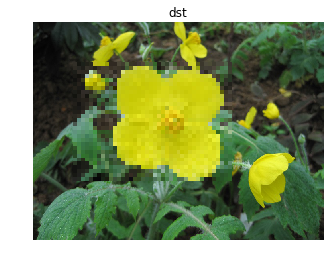

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

mm = 10 # 10*10的小方框
# 需要马赛克区域：[100:600, 100:500]
for m in range(100,400):
    for n in range(100,500):
        # 10*10小方框中的所有像素都和该方框左上角的像素保持一致
        if m%10 == 0 and n%10==0:
            img[m:m+mm, n:n+mm] = img[m,n]

plt.figure()
(r, g, b)=cv2.split(img)
img=cv2.merge([b,g,r])
plt.imshow(img)
plt.axis('off') # 关掉坐标轴为 off
plt.title('dst') # 图像题目
plt.show()

## 毛玻璃

马赛克是把方框中的所有像素都用方框中同一个像素替代，毛玻璃是把方框中的每个像素都用方框中一个随机的像素替代，所以替代完后每个像素的值仍然不同。

<img src='images/毛玻璃效果.jpg' width=50%>

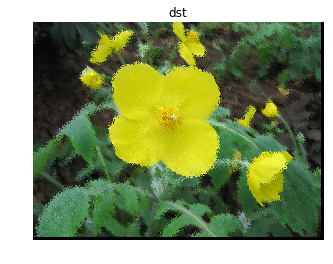

In [35]:
import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3), np.uint8)

mm = 8 # 8*8的小方框
for m in range(0, height-mm):
    for n in range(0, width-mm):
        index = int(np.random.random()*mm) #0-8
        (b,g,r) = img[m+index, n+index]
        dst[m,n] = (b,g,r)

# 最右边和最下边有黑色的边框，是宽度和高度都减去了八个像素造成的
plt.figure()
(r, g, b)=cv2.split(dst)
img=cv2.merge([b,g,r])
plt.imshow(img)
plt.axis('off') # 关掉坐标轴为 off
plt.title('dst') # 图像题目
plt.show()

## 浮雕/雕刻效果

浮雕效果和边缘检测类似，也要计算梯度。

浮雕算法对图像的每一个点进行卷积处理。假设原图像为X，处理后的图像为Y，浮雕算法核kernel矩阵定义为：  
 ```
 [[1, 0,  0],
  [0, 0,  0],
  [0, 0, -1]]
```
对于坐标为(i,j)点，浮雕效果图的算法为Y(i,j) = X(i+1,j+1) - X(i-1,j-1) + 128。当然，X,Y的取值均在0~255之间。  
像素值相减是为了突出灰度图边缘细节，加上一个定值为了增强图片的浮雕灰度等级。

雕刻算法核kernel矩阵定义为：  
```
[[1,  0],
 [0, -1]]
```
那么对于坐标为(i,j)点，其浮雕效果图的算法为Y(i,j) = X(i,j) - X(i-1,j-1) + 128。当然，X,Y的取值均在0~255之间。

<img src='images/浮雕效果.jpg' width=50%>

In [40]:
import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst1 = np.zeros((height,width,1), np.uint8)
dst2 = np.zeros((height,width,1), np.uint8)

# 浮雕
for i in range(1, height-1):
    for j in range(1, width-1):
        grayP0 = int(gray[i-1,j-1])
        grayP1 = int(gray[i+1,j+1])
        newP = grayP0 - grayP1 + 128
        if newP > 255: newP = 255
        if newP < 0:   newP = 0
        dst1[i,j] = newP

# 雕刻
for i in range(0, height-1):
    for j in range(0, width-1):
        grayP0 = int(gray[i,j])
        grayP1 = int(gray[i+1,j+1])
        newP = grayP0 - grayP1 + 128
        if newP > 255: newP = 255
        if newP < 0:   newP = 0
        dst2[i,j] = newP
        
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.waitKey(0)

-1

## 颜色映射

根据颜色映射查找表或者颜色映射公式进行颜色映射，来得到各种不同的颜色效果。  
* 颜色映射查找表：根据原始图像中像素的RGB值，通过查找表得到新的RGB值
* 颜色映射公式：利用公式的方法不能表达更复杂的效果，甚至计算量很大

<img src='images/颜色映射.jpg' width=50%>

In [41]:
# 使图像风格整体偏蓝色
# b = b*1.6
# g = g*1.3

import cv2
import numpy as np
img = cv2.imread('image0.jpg',1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3),np.uint8)

for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        b, g = b*1.6, g*1.3 # 蓝色增强
        if b>255: b = 255
        if g>255: g = 255
        dst[i,j] = (b,g,r)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

## 油画效果

油画处理后的图片细节更少，油画效果处理步骤：
```python
1. color -> gray
2. 将图片分割为若干个小方块（比如 7*7 10*10），统计这些小方块中每个像素的灰度值
3. 将范围在0-255的灰度值划分为多个等级，并把方块中的像素分别映射到不同的灰度等级
   比如把256个灰度值划分为8个等级，每个等级有32个灰度值，灰度值为50就代表属于第2等级(32,63)
4. 找到每个方块中像素个数最多的灰度等级，并计算该灰度等级中所有像素的均值
5. 用这个平均值来替代方块中间像素的像素值
```

In [69]:
import cv2
import numpy as np
img = cv2.imread('image00.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = np.zeros((height,width,3), np.uint8)

for i in range(4, height-4):
    for j in range(4, width-4):
        # 8个灰度等级，ranks保存每个等级的像素个数
        ranks = np.zeros(8, np.uint8)
#         box = gray[i-4:i+4, j-4:j+4] // 32
#         for i in range(len(ranks)):
#             ranks[i] = np.sum(box==i)
        for m in range(-4, 4): # 小方块8*8
            for n in range(-4, 4):
                # 统计每个等级的像素个数
                r = int(gray[i+m,j+n]/32)
                ranks[r] = ranks[r]+1
        # 像素个数最多的等级
        index = np.argmax(ranks)
        # 简化 不用均值
        for m in range(-4,4):
            for n in range(-4,4):
                # 取出方块中在该等级里的一个值，32是一个等级的像素个数
                if (index*32) <= gray[i+m,j+n] <= ((index+1)*32):
                    (b,g,r) = img[i+m,j+n]
                    break
        dst[i,j] = (b,g,r)

Wall time: 26.8 s


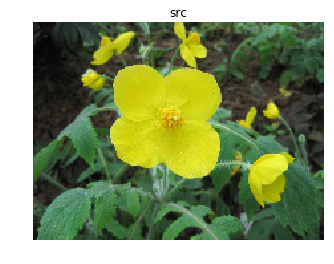

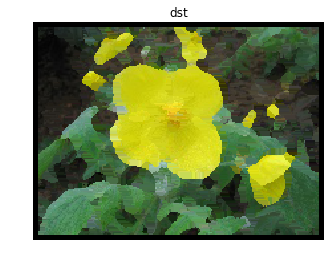

In [70]:
plt.figure()
(r, g, b)=cv2.split(img)
img=cv2.merge([b,g,r])
plt.imshow(img)
plt.title('src')
plt.axis('off')
plt.figure()
(r, g, b)=cv2.split(dst)
dst=cv2.merge([b,g,r])
plt.imshow(dst)
plt.title('dst')
plt.axis('off') # 关掉坐标轴为 off
plt.show()